![conjoint survey](conjoint_survey.png)

In [1]:
cbc.df <- read.csv("http://goo.gl/5xQObB", 
                   colClasses = c(seat = "factor", price = "factor"))
summary(cbc.df)

    resp.id            ques         alt    carpool    seat     cargo     
 Min.   :  1.00   Min.   : 1   Min.   :1   no :6345   6:3024   2ft:4501  
 1st Qu.: 50.75   1st Qu.: 4   1st Qu.:1   yes:2655   7:2993   3ft:4499  
 Median :100.50   Median : 8   Median :2              8:2983             
 Mean   :100.50   Mean   : 8   Mean   :2                                 
 3rd Qu.:150.25   3rd Qu.:12   3rd Qu.:3                                 
 Max.   :200.00   Max.   :15   Max.   :3                                 
   eng       price         choice      
 elec:3010   30:2998   Min.   :0.0000  
 gas :3005   35:2997   1st Qu.:0.0000  
 hyb :2985   40:3005   Median :0.0000  
                       Mean   :0.3333  
                       3rd Qu.:1.0000  
                       Max.   :1.0000  

In [3]:
xtabs(choice ~ price, data=cbc.df)
xtabs(choice ~ cargo, data=cbc.df)

price
  30   35   40 
1486  956  558 

cargo
 2ft  3ft 
1312 1688 

In [4]:
# Fitting a choice model with mlogit
library(mlogit)
cbc.mlogit <- mlogit.data(data=cbc.df, choice="choice", shape="long", 
                          varying=3:6, alt.levels=paste("pos",1:3), 
                          id.var="resp.id")

Loading required package: Formula
Loading required package: maxLik
Loading required package: miscTools

Please cite the 'maxLik' package as:
Henningsen, Arne and Toomet, Ott (2011). maxLik: A package for maximum likelihood estimation in R. Computational Statistics 26(3), 443-458. DOI 10.1007/s00180-010-0217-1.

If you have questions, suggestions, or comments regarding the 'maxLik' package, please use a forum or 'tracker' at maxLik's R-Forge site:
https://r-forge.r-project.org/projects/maxlik/


In [6]:
m1 <- mlogit(choice ~ 0 + seat + cargo + eng + price, data = cbc.mlogit)
summary(m1)


Call:
mlogit(formula = choice ~ 0 + seat + cargo + eng + price, data = cbc.mlogit, 
    method = "nr", print.level = 0)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.32700 0.33467 0.33833 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 7.84E-05 
successive function values within tolerance limits 

Coefficients :
          Estimate Std. Error  t-value  Pr(>|t|)    
seat7    -0.535280   0.062360  -8.5837 < 2.2e-16 ***
seat8    -0.305840   0.061129  -5.0032 5.638e-07 ***
cargo3ft  0.477449   0.050888   9.3824 < 2.2e-16 ***
enggas    1.530762   0.067456  22.6926 < 2.2e-16 ***
enghyb    0.719479   0.065529  10.9796 < 2.2e-16 ***
price35  -0.913656   0.060601 -15.0765 < 2.2e-16 ***
price40  -1.725851   0.069631 -24.7856 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log-Likelihood: -2581.6

In [7]:
m2 <- mlogit(choice ~ seat + cargo + eng + price, data = cbc.mlogit)
summary(m2)


Call:
mlogit(formula = choice ~ seat + cargo + eng + price, data = cbc.mlogit, 
    method = "nr", print.level = 0)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.32700 0.33467 0.33833 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 7.86E-05 
successive function values within tolerance limits 

Coefficients :
                   Estimate Std. Error  t-value  Pr(>|t|)    
pos 2:(intercept)  0.028980   0.051277   0.5652    0.5720    
pos 3:(intercept)  0.041271   0.051384   0.8032    0.4219    
seat7             -0.535369   0.062369  -8.5840 < 2.2e-16 ***
seat8             -0.304369   0.061164  -4.9763 6.481e-07 ***
cargo3ft           0.477705   0.050899   9.3854 < 2.2e-16 ***
enggas             1.529423   0.067471  22.6677 < 2.2e-16 ***
enghyb             0.717929   0.065554  10.9517 < 2.2e-16 ***
price35           -0.913777   0.060608 -15.0769 < 2.2e-16 ***
price40           -1.726878   0.069654 -24.7922 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

In [8]:
lrtest(m1, m2)

Likelihood ratio test

Model 1: choice ~ 0 + seat + cargo + eng + price
Model 2: choice ~ seat + cargo + eng + price
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   7 -2581.6                     
2   9 -2581.3  2 0.6789     0.7122

In [10]:
m3 <- mlogit(choice ~ 0 + seat + cargo + eng 
                      + as.numeric(as.character(price)), 
             data = cbc.mlogit)
summary(m3)
lrtest(m1, m3)


Call:
mlogit(formula = choice ~ 0 + seat + cargo + eng + as.numeric(as.character(price)), 
    data = cbc.mlogit, method = "nr", print.level = 0)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.32700 0.33467 0.33833 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 8E-05 
successive function values within tolerance limits 

Coefficients :
                                  Estimate Std. Error  t-value  Pr(>|t|)    
seat7                           -0.5345392  0.0623518  -8.5730 < 2.2e-16 ***
seat8                           -0.3061074  0.0611184  -5.0084 5.488e-07 ***
cargo3ft                         0.4766936  0.0508632   9.3721 < 2.2e-16 ***
enggas                           1.5291247  0.0673982  22.6879 < 2.2e-16 ***
enghyb                           0.7183908  0.0654963  10.9684 < 2.2e-16 ***
as.numeric(as.character(price)) -0.1733053  0.0069398 -24.9726 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log-Likelihood: -2582.1

Likelihood ratio test

Model 1: choice ~ 0 + seat + cargo + eng + price
Model 2: choice ~ 0 + seat + cargo + eng + as.numeric(as.character(price))
  #Df  LogLik Df  Chisq Pr(>Chisq)
1   7 -2581.6                     
2   6 -2582.1 -1 0.9054     0.3413

Instead of presenting the coefficients, most choice modelers pre- fer to focus on using the model to make choice share predictions or to compute willingness-to-pay for each attribute.

** Willingness-to-Pay **

Willingness-to-pay is a bit of a misnomer; the proper interpretation of this number is that, on average, customers would be equally divided between a minivan with 2 ft of cargo space and a minivan with 3 ft of cargo space that costs $2750.60 more.

In [11]:
coef(m3)["cargo3ft"]/(-coef(m3)["as.numeric(as.character(price))"]/1000)

cargo3ft 
2750.601

#### Simulating Choice Shares

In [12]:
# Predicting shares
predict.mnl <- function(model, data) {
  # Function for predicting shares from a multinomial logit model 
  # model: mlogit object returned by mlogit()
  # data: a data frame containing the set of designs for which you want to 
  #       predict shares.  Same format at the data used to estimate model. 
  data.model <- model.matrix(update(model$formula, 0 ~ .), data = data)[,-1]
  utility <- data.model%*%model$coef
  share <- exp(utility)/sum(exp(utility))
  cbind(share, data)
}

In [17]:
attrib <- list(seat = c("6", "7", "8"), 
               cargo = c("2ft", "3ft"),
               eng = c("gas", "hyb", "elec"), 
               price = c("30", "35", "40"))

In [18]:
(new.data <- expand.grid(attrib)[c(8, 1, 3, 41, 49, 26), ])

seat cargo  eng price
8     7   2ft  hyb    30
1     6   2ft  gas    30
3     8   2ft  gas    30
41    7   3ft  gas    40
49    6   2ft elec    40
26    7   2ft  hyb    35

In [19]:
predict.mnl(m3, new.data)

share seat cargo  eng price
8  0.44278782    7   2ft  hyb    30
1  0.16377692    6   2ft  gas    30
3  0.12059018    8   2ft  gas    30
41 0.02731967    7   3ft  gas    40
49 0.05937323    6   2ft elec    40
26 0.18615216    7   2ft  hyb    35

In [20]:
predict.mnl(m1, new.data)

share seat cargo  eng price
8  0.44643895    7   2ft  hyb    30
1  0.16497955    6   2ft  gas    30
3  0.12150814    8   2ft  gas    30
41 0.02771959    7   3ft  gas    40
49 0.06030713    6   2ft elec    40
26 0.17904663    7   2ft  hyb    35

In [35]:
update(m1$formula, 0 ~ .)

1 - 1 ~ seat + cargo + eng + price - 1

In [31]:
model.matrix(update(m1$formula, 0 ~ .), data = new.data)[,-1]

seat7 seat8 cargo3ft enghyb engelec price35 price40
8      1     0        0      1       0       0       0
1      0     0        0      0       0       0       0
3      0     1        0      0       0       0       0
41     1     0        1      0       0       0       1
49     0     0        0      0       1       0       1
26     1     0        0      1       0       1       0

In [37]:
# Share sensitivity
sensitivity.mnl <- function(model, attrib, base.data, competitor.data) {
  # Function for creating data for a share-sensitivity chart
  # model: mlogit object returned by mlogit() function
  # attrib: list of vectors with attribute levels to be used in sensitivity
  # base.data: data frame containing baseline design of target product
  # competitor.data: data frame contining design of competitive set
  data <- rbind(base.data, competitor.data)
  base.share <- predict.mnl(model, data)[1,1]
  share <- NULL
  for (a in seq_along(attrib)) {
    for (i in attrib[[a]]) {
      data[1,] <- base.data
      data[1,a] <- i
      share <- c(share, predict.mnl(model, data)[1,1])
    }
  }
  data.frame(level=unlist(attrib), share=share, increase=share-base.share)
}

level     share    increase
seat1      6 0.5793757  0.13293673
seat2      7 0.4464390  0.00000000
seat3      8 0.5035926  0.05715367
cargo1   2ft 0.4464390  0.00000000
cargo2   3ft 0.5652211  0.11878218
eng1     gas 0.1485738 -0.29786514
eng2     hyb 0.4464390  0.00000000
eng3    elec 0.2637920 -0.18264692
price1    30 0.4464390  0.00000000
price2    35 0.2443963 -0.20204262
price3    40 0.1255468 -0.32089212

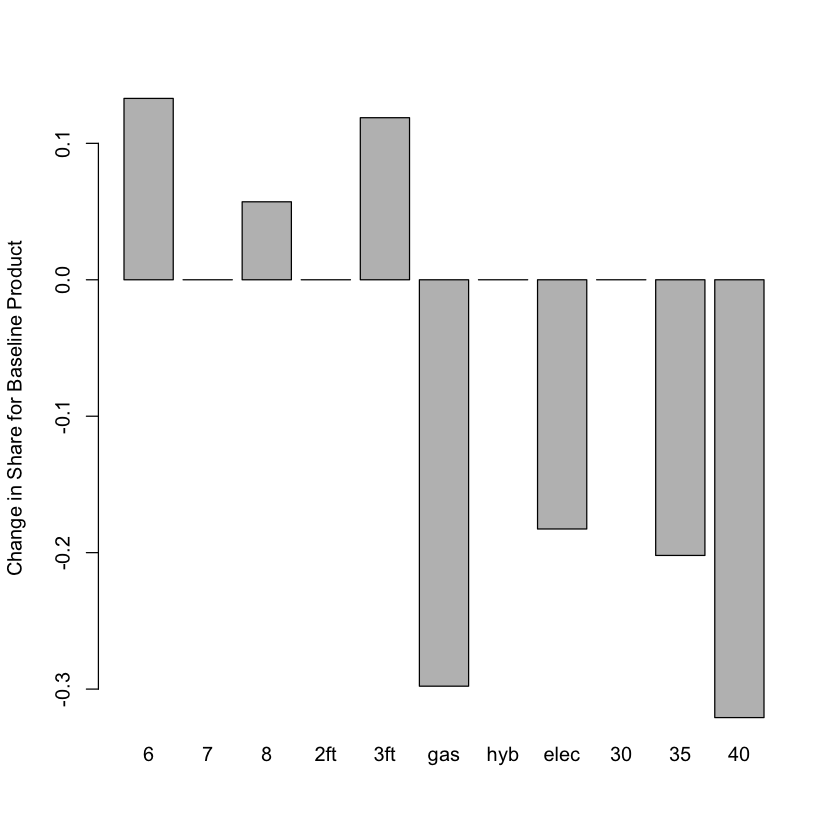

In [38]:
base.data <- expand.grid(attrib)[c(8), ]
competitor.data <- expand.grid(attrib)[c(1, 3, 41, 49, 26), ]
(tradeoff <- sensitivity.mnl(m1, attrib, base.data, competitor.data))

barplot(tradeoff$increase, horiz=FALSE, names.arg=tradeoff$level,
        ylab="Change in Share for Baseline Product")

In [39]:
# Share predictions for two identical vehicles
new.data.2 <- expand.grid(attrib)[c(8, 8, 1, 3, 41, 49, 26), ]
predict.mnl(m1, new.data.2) 

share seat cargo  eng price
8   0.30864694    7   2ft  hyb    30
8.1 0.30864694    7   2ft  hyb    30
1   0.11405912    6   2ft  gas    30
3   0.08400502    8   2ft  gas    30
41  0.01916403    7   3ft  gas    40
49  0.04169352    6   2ft elec    40
26  0.12378444    7   2ft  hyb    35

The property has been given a name: the independence of irrelevant alternatives or IIA property. It is also sometimes called the “red bus/blue bus problem” based on a classic example that involves predicting share for two different color buses that have otherwise identical features. 

There are a number of proposed meth- ods to estimate choice models that do not have the IIA property including nested logit, generalized logit, and multinomial probit. If you need to predict shares for nearly identical designs, we encourage you to review those alternatives. However, the majority of marketers today use either the multinomial logit or the hierarchical multinomial logit model, and—we hope—try to avoid including identical or nearly identical designs when estimating shares.

#### Planning the Sample Size for a Conjoint Study

In [40]:
# Prediction uncertainty & conjoint design
small.cbc <- mlogit.data(data=cbc.df[1:(25*15*3),], 
                              choice="choice", shape="long", 
                              varying=3:6, alt.levels=paste("pos", 1:3), 
                              id.var="resp.id")
m4 <- mlogit(choice ~ 0 + seat + cargo + eng + price, data = small.cbc)
summary(m4)  # larger standard errors


Call:
mlogit(formula = choice ~ 0 + seat + cargo + eng + price, data = small.cbc, 
    method = "nr", print.level = 0)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.31467 0.35467 0.33067 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 1.39E-05 
successive function values within tolerance limits 

Coefficients :
         Estimate Std. Error t-value  Pr(>|t|)    
seat7    -0.74326    0.17767 -4.1833 2.873e-05 ***
seat8    -0.15180    0.16859 -0.9004  0.367914    
cargo3ft  0.45613    0.14459  3.1546  0.001607 ** 
enggas    1.62677    0.19764  8.2311 2.220e-16 ***
enghyb    1.03003    0.19179  5.3707 7.844e-08 ***
price35  -0.81508    0.17304 -4.7105 2.471e-06 ***
price40  -1.71390    0.20304 -8.4410 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log-Likelihood: -319.79

### Adding Consumer Heterogeneity to Choice Models

In [41]:
# Model estimation
m1.rpar <- rep("n", length=length(m1$coef))
names(m1.rpar) <- names(m1$coef)
m1.rpar

seat7    seat8 cargo3ft   enggas   enghyb  price35  price40 
     "n"      "n"      "n"      "n"      "n"      "n"      "n"

In [42]:
m1.hier <- mlogit(choice ~ 0 + seat + eng + cargo + price, 
                  data = cbc.mlogit, 
                  panel=TRUE, rpar = m1.rpar, correlation = FALSE)
summary(m1.hier)


Call:
mlogit(formula = choice ~ 0 + seat + eng + cargo + price, data = cbc.mlogit, 
    rpar = m1.rpar, correlation = FALSE, panel = TRUE)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.32700 0.33467 0.33833 

bfgs method
22 iterations, 0h:0m:18s 
g'(-H)^-1g = 2.1E-07 
gradient close to zero 

Coefficients :
             Estimate Std. Error  t-value  Pr(>|t|)    
seat7       -0.600697   0.070101  -8.5691 < 2.2e-16 ***
seat8       -0.384300   0.069424  -5.5356 3.102e-08 ***
enggas       1.752235   0.079676  21.9919 < 2.2e-16 ***
enghyb       0.805668   0.072161  11.1648 < 2.2e-16 ***
cargo3ft     0.565593   0.059620   9.4867 < 2.2e-16 ***
price35     -1.087194   0.071459 -15.2143 < 2.2e-16 ***
price40     -2.000396   0.088539 -22.5933 < 2.2e-16 ***
sd.seat7     0.652917   0.096309   6.7794 1.207e-11 ***
sd.seat8     0.911873   0.087955  10.3676 < 2.2e-16 ***
sd.enggas    0.536984   0.104587   5.1343 2.831e-07 ***
sd.enghyb   -0.237275   0.125759  -1.8867 0.0591945 .  
sd.carg

In [43]:
m2.hier <- update(m1.hier, correlation = TRUE)
summary(m2.hier)


Call:
mlogit(formula = choice ~ 0 + seat + eng + cargo + price, data = cbc.mlogit, 
    rpar = m1.rpar, correlation = TRUE, panel = TRUE)

Frequencies of alternatives:
  pos 1   pos 2   pos 3 
0.32700 0.33467 0.33833 

bfgs method
39 iterations, 0h:0m:39s 
g'(-H)^-1g = 8.35E-08 
gradient close to zero 

Coefficients :
                   Estimate Std. Error  t-value  Pr(>|t|)    
seat7             -0.583368   0.070819  -8.2374 2.220e-16 ***
seat8             -0.356548   0.073703  -4.8376 1.314e-06 ***
enggas             1.836817   0.085848  21.3962 < 2.2e-16 ***
enghyb             0.890331   0.080081  11.1179 < 2.2e-16 ***
cargo3ft           0.568073   0.062672   9.0642 < 2.2e-16 ***
price35           -1.136492   0.074638 -15.2267 < 2.2e-16 ***
price40           -2.087973   0.091504 -22.8185 < 2.2e-16 ***
seat7.seat7        0.620124   0.102666   6.0402 1.539e-09 ***
seat7.seat8        0.698788   0.104064   6.7150 1.881e-11 ***
seat7.cargo3ft     0.920783   0.112715   8.1692 2.220e-16 *

In [44]:
cov2cor(cov.mlogit(m2.hier))

seat7       seat8    cargo3ft      enggas       enghyb
seat7     1.000000000  0.59427757  0.87066715  0.75985246  0.005193981
seat8     0.594277565  1.00000000  0.12434676  0.06406143  0.040034526
cargo3ft  0.870667154  0.12434676  1.00000000  0.92122916 -0.064291181
enggas    0.759852461  0.06406143  0.92122916  1.00000000 -0.394547443
enghyb    0.005193981  0.04003453 -0.06429118 -0.39454744  1.000000000
price35  -0.048163608 -0.16839517  0.03053983 -0.03080671 -0.333677730
price40   0.072648461 -0.02192483  0.11915162  0.23588634 -0.546420370
             price35     price40
seat7    -0.04816361  0.07264846
seat8    -0.16839517 -0.02192483
cargo3ft  0.03053983  0.11915162
enggas   -0.03080671  0.23588634
enghyb   -0.33367773 -0.54642037
price35   1.00000000  0.51302009
price40   0.51302009  1.00000000

For this reason, we strongly recommend that you include correlations in all random coefficients choice models.

In [46]:
predict.hier.mnl <- function(model, data, nresp=1000) {
  # Function for predicting shares from a hierarchical multinomial logit model 
  # model: mlogit object returned by mlogit()
  # data: a data frame containing the set of designs for which you want to 
  #       predict shares.  Same format at the data used to estimate model. 
  # Note that this code assumes all model parameters are random
  data.model <- model.matrix(update(model$formula, 0 ~ .), data = data)[,-1]
  coef.Sigma <- cov.mlogit(model)
  coef.mu <- m2.hier$coef[1:dim(coef.Sigma)[1]]
  draws <- mvrnorm(n=nresp, coef.mu, coef.Sigma)
  shares <- matrix(NA, nrow=nresp, ncol=nrow(data))
  for (i in 1:nresp) {
    utility <- data.model%*%draws[i,]
    share = exp(utility)/sum(exp(utility))
    shares[i,] <- share
  }
  cbind(colMeans(shares), data)
}

In [48]:
library(MASS)
predict.hier.mnl(m2.hier, data=new.data)

colMeans(shares) seat cargo  eng price
8        0.45369314    7   2ft  hyb    30
1        0.18472196    6   2ft  gas    30
3        0.13321905    8   2ft  gas    30
41       0.01794268    7   3ft  gas    40
49       0.05410889    6   2ft elec    40
26       0.15631428    7   2ft  hyb    35

### Hierarchical Bayes Choice Models

In [49]:
head(cbc.df)

resp.id ques alt carpool seat cargo  eng price choice
1       1    1   1     yes    6   2ft  gas    35      0
2       1    1   2     yes    8   3ft  hyb    30      0
3       1    1   3     yes    6   3ft  gas    30      1
4       1    2   1     yes    6   2ft  gas    30      0
5       1    2   2     yes    7   3ft  gas    35      1
6       1    2   3     yes    6   2ft elec    35      0

ChoiceModelR requires the data to be stored in a “long” data frame where each row is an alternative (as we have already in cbc.df), but it requires the selected alternative to be stored as an integer number on the first row of each choice task, with zeros in the remaining rows.

In [50]:
choice <- rep(0, nrow(cbc.df))
choice[cbc.df[,"alt"]==1] <- cbc.df[cbc.df[,"choice"]==1,"alt"]
head(choice)

[1] 3 0 0 2 0 0

In [51]:
cbc.coded <- model.matrix(~ seat + eng + cargo + price, data = cbc.df) 
cbc.coded <- cbc.coded[, -1] # remove the intercept
head(cbc.coded)

seat7 seat8 enggas enghyb cargo3ft price35 price40
1     0     0      1      0        0       1       0
2     0     1      0      1        1       0       0
3     0     0      1      0        1       0       0
4     0     0      1      0        0       0       0
5     1     0      1      0        1       1       0
6     0     0      0      0        0       1       0

In [52]:
choicemodelr.data <- cbind(cbc.df[,1:3], cbc.coded, choice)
head(choicemodelr.data)

resp.id ques alt seat7 seat8 enggas enghyb cargo3ft price35 price40 choice
1       1    1   1     0     0      1      0        0       1       0      3
2       1    1   2     0     1      0      1        1       0       0      0
3       1    1   3     0     0      1      0        1       0       0      0
4       1    2   1     0     0      1      0        0       0       0      2
5       1    2   2     1     0      1      0        1       1       0      0
6       1    2   3     0     0      0      0        0       1       0      0

In [53]:
carpool <- cbc.df$carpool[cbc.df$ques==1 & cbc.df$alt==1]=="yes"
carpool <- as.numeric(carpool)
choicemodelr.demos <- as.matrix(carpool, nrow=length(carpool))
str(choicemodelr.demos)

 num [1:200, 1] 1 0 0 0 1 0 0 1 0 0 ...


Note that each row in choicemodelr.demos represents a respondent and not a question or an alternative, and so we have 200 rows. 

                    Logit Data                    
Attribute       Type         Levels
-----------------------------------
Attribute 1    Linear          1
Attribute 2    Linear          1
Attribute 3    Linear          1
Attribute 4    Linear          1
Attribute 5    Linear          1
Attribute 6    Linear          1
Attribute 7    Linear          1

7 parameters to be estimated.

200 total units.
Average of 3 alternatives in each of 15 sets per unit.
3000 tasks in total.

Table of choice data pooled across units:
Choice  Count   Pct.
--------------------
   1    981    32.7%
   2    1004   33.47%
   3    1015   33.83%

      MCMC Inference for Hierarchical Logit       
Total Iterations:          20000
Draws used in estimation:  10000
Units:                     200
Parameters per unit:       7
Constraints not in effect.
Draws are to be saved.
Prior degrees of freedom:  5
Prior variance:            2

MCMC Iteration Beginning...


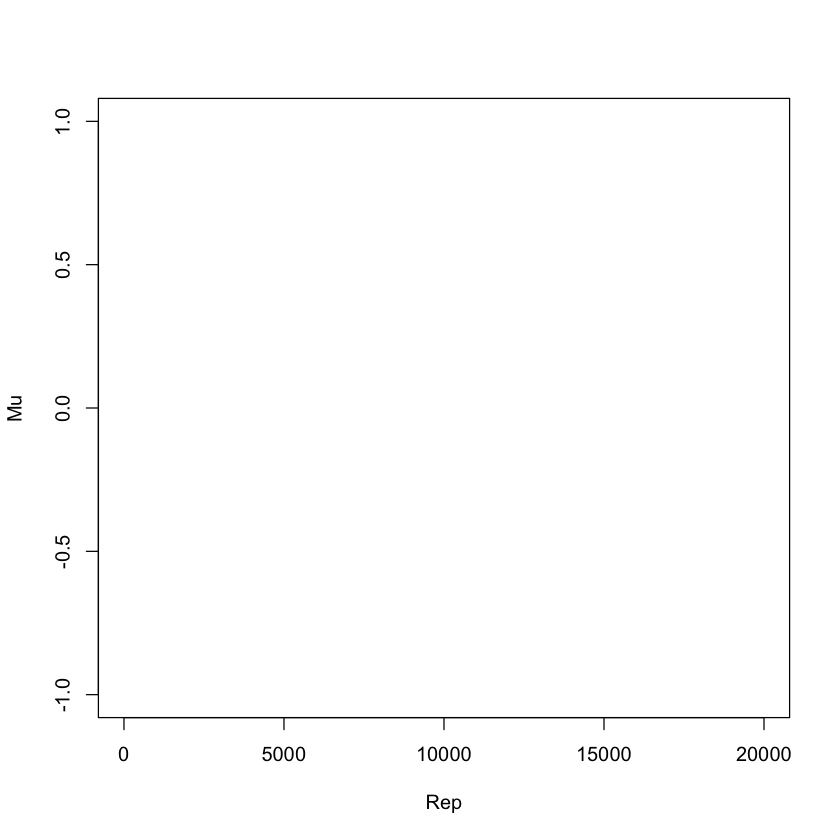

Iteration  Acceptance   RLH     Pct. Cert.   Avg. Var.   RMS     Time to End
      100  0.381        0.397   0.148        0.32        0.51    1:10  


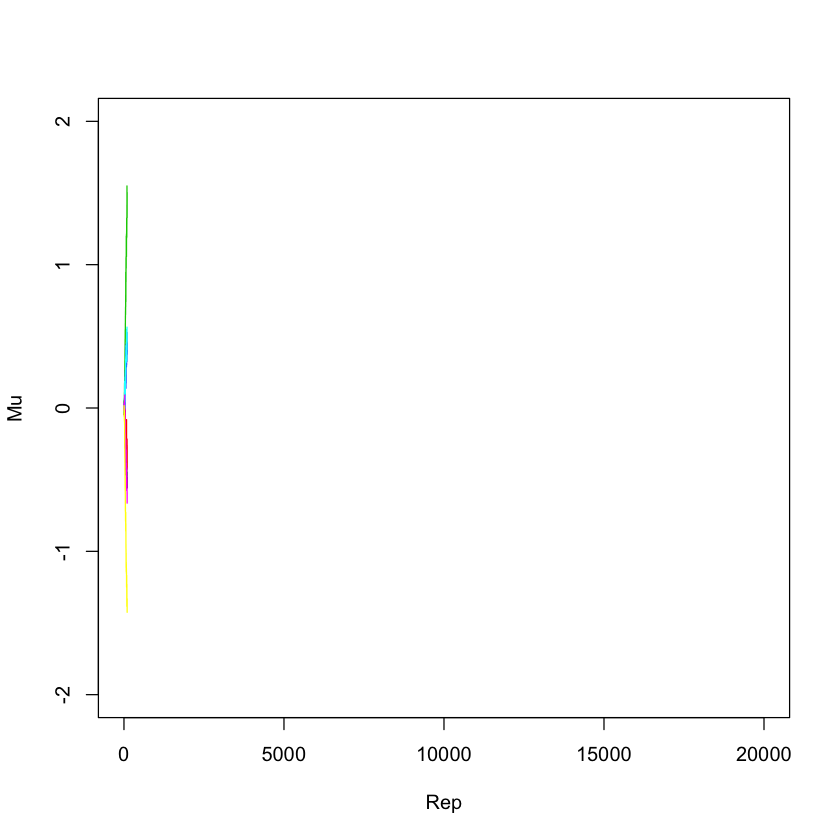

      200  0.301        0.461   0.286        0.64        1.10    1:08  
      300  0.300        0.489   0.345        0.88        1.50    1:04  
      400  0.302        0.502   0.370        1.10        1.74    1:02  
      500  0.310        0.506   0.379        1.17        1.82    1:00  
      600  0.303        0.508   0.383        1.17        1.82    0:58  
      700  0.309        0.505   0.379        1.14        1.81    0:57  
      800  0.298        0.507   0.381        1.20        1.82    0:57  
      900  0.303        0.510   0.387        1.19        1.86    0:56  
     1000  0.300        0.507   0.382        1.14        1.85    0:55  
     1100  0.307        0.505   0.378        1.11        1.82    0:55  
     1200  0.308        0.505   0.379        1.13        1.80    0:54  
     1300  0.304        0.509   0.385        1.19        1.82    0:54  
     1400  0.309        0.508   0.384        1.17        1.80    0:53  
     1500  0.311        0.510   0.387        1.17        1.82   

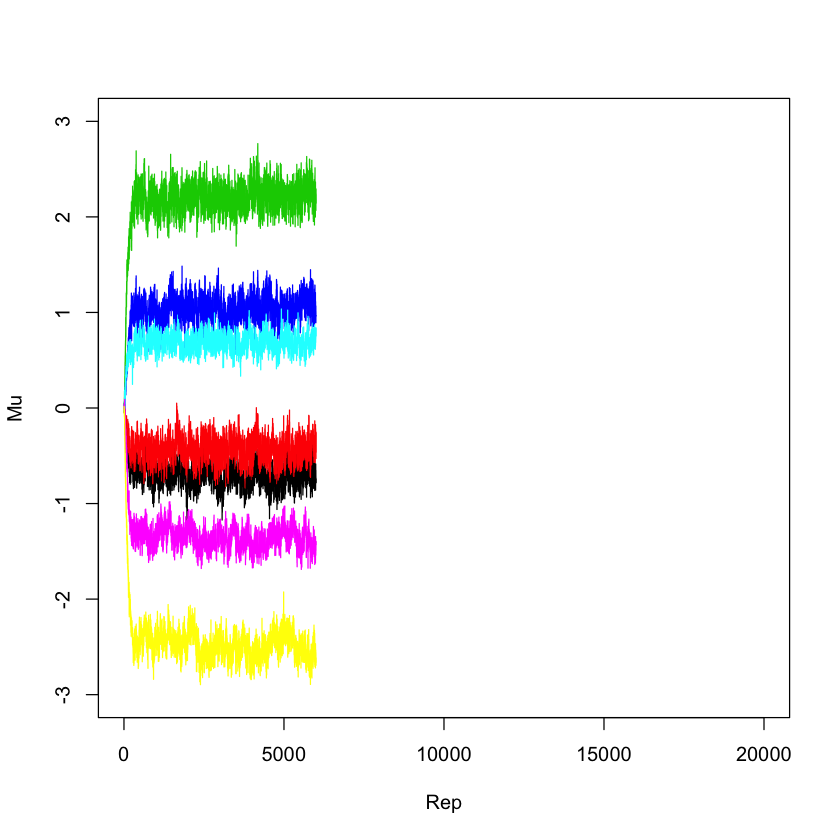

     6100  0.308        0.510   0.388        1.24        1.90    0:39  
     6200  0.305        0.510   0.386        1.23        1.85    0:39  
     6300  0.302        0.509   0.386        1.23        1.85    0:38  
     6400  0.313        0.506   0.381        1.21        1.86    0:38  
     6500  0.305        0.508   0.383        1.16        1.85    0:38  
     6600  0.311        0.509   0.385        1.18        1.84    0:37  
     6700  0.309        0.511   0.388        1.18        1.85    0:37  
     6800  0.302        0.508   0.383        1.14        1.83    0:37  
     6900  0.308        0.508   0.384        1.19        1.89    0:37  
     7000  0.309        0.510   0.387        1.16        1.86    0:36  
     7100  0.304        0.508   0.383        1.17        1.83    0:36  
     7200  0.308        0.509   0.386        1.29        1.91    0:36  
     7300  0.305        0.512   0.390        1.29        1.89    0:36  
     7400  0.304        0.510   0.387        1.25        1.89   

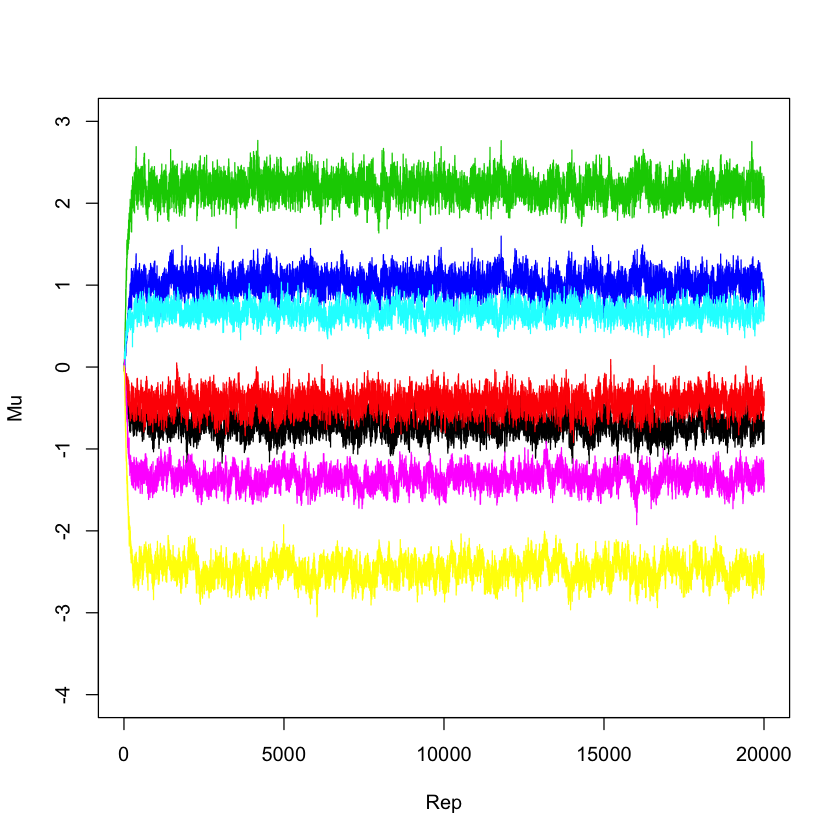

In [54]:
library(ChoiceModelR)
hb.post <- choicemodelr(data=choicemodelr.data, xcoding=rep(1, 7), 
                           demos=choicemodelr.demos, 
                           mcmc=list(R=20000, use=10000),
                           options=list(save=TRUE))

In [55]:
names(hb.post)

[1] "betadraw"  "deltadraw" "compdraw"  "loglike"

In [56]:
hb.post$compdraw[[567]]$mu

[1] -0.6062266 -0.4617015  2.1321807  1.1853511  0.5813157 -1.0759865 -2.5183413

The parameters above represent the average part worth parameters among respondents who do not use their car to carpool. The hierarchical Bayes model also includes a set of “adjustments” for people who carpool. 

The average part worth for 7 seats (versus the base level of 6) for people who carpool is −0.606 + 1.574 = 0.968. This means that on average people who carpool actually prefer 7 over 6 seats while people who don’t carpool prefer 6 seats on average. This is a potentially critical insight for product designers that we completely missed when we used the mixed logit model with mlogit.

In [57]:
hb.post$deltadraw[567,]

[1]  1.57389139  1.62839553  0.29864315  0.09501876 -0.01031468 -0.14076715
[7] -0.34549072

In [58]:
hb.post$compdraw[[567]]$rooti

[,1]       [,2]        [,3]         [,4]       [,5]         [,6]
[1,] 0.9045433 -0.2128646 -0.04710085 -0.070466865  0.2338563 -0.142169802
[2,] 0.0000000  0.8754004  0.14139672  0.003165622  0.1022291 -0.262633464
[3,] 0.0000000  0.0000000  0.80037461 -0.888348885 -0.1621882 -0.152986867
[4,] 0.0000000  0.0000000  0.00000000  1.144520511  0.2650395  0.064519306
[5,] 0.0000000  0.0000000  0.00000000  0.000000000  1.1161869 -0.003486716
[6,] 0.0000000  0.0000000  0.00000000  0.000000000  0.0000000  1.324225159
[7,] 0.0000000  0.0000000  0.00000000  0.000000000  0.0000000  0.000000000
             [,7]
[1,] -0.078580141
[2,] -0.006908157
[3,] -0.032582399
[4,] -0.040486823
[5,]  0.160451446
[6,] -0.337415408
[7,]  1.152626366

In [59]:
# covariance matrix
crossprod(hb.post$compdraw[[567]]$rooti)

[,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,]  0.81819866 -0.19254527 -0.04260476 -0.06374033  0.21153316 -0.12859875
[2,] -0.19254527  0.81163719  0.13380485  0.01777109  0.03971169 -0.19964652
[3,] -0.04260476  0.13380485  0.66281104 -0.70724524 -0.12637128 -0.15288600
[4,] -0.06374033  0.01777109 -0.70724524  2.10406654  0.43126739  0.21893624
[5,]  0.21153316  0.03971169 -0.12637128  0.43126739  1.40756363 -0.02207509
[6,] -0.12859875 -0.19964652 -0.15288600  0.21893624 -0.02207509  1.87034074
[7,] -0.07107914  0.01067953 -0.02335372 -0.01187803  0.15456499 -0.43201489
            [,7]
[1,] -0.07107914
[2,]  0.01067953
[3,] -0.02335372
[4,] -0.01187803
[5,]  0.15456499
[6,] -0.43201489
[7,]  1.47706472

In [60]:
head(hb.post$betadraw[,,567])

[,1]       [,2]     [,3]      [,4]        [,5]       [,6]      [,7]
[1,]  1.5510826  0.0416114 2.444770 2.4984129  1.35441662 -0.8626406 -2.619638
[2,] -1.2406587  0.3742946 1.076199 0.7027532  0.06704296 -2.8309861 -2.395720
[3,] -3.0299202 -2.6651449 1.810094 0.7901367  0.18377502 -2.4552525 -3.375509
[4,] -0.3973462 -0.3673226 2.557959 2.3164501  0.65870309 -1.9611104 -1.975122
[5,]  1.4126005  0.1608840 2.668743 1.6581943 -0.13657482 -1.7159626 -2.365746
[6,] -1.5385681 -0.5314301 2.612886 0.7390989  1.37775835 -0.3757187 -2.175263

In [61]:
str(hb.post$betadraw)

 num [1:200, 1:7, 1:1000] 1.095 -0.773 -2.323 -0.786 1.868 ...


In [62]:
beta.post.mean <- apply(hb.post$betadraw, 1:2, mean)
head(beta.post.mean)

[,1]         [,2]     [,3]      [,4]       [,5]       [,6]      [,7]
[1,]  0.6673137  0.308337794 1.393498 1.0700737 1.13352109 -0.4596062 -2.388250
[2,] -2.1409175  0.673750707 1.850176 0.7468379 0.98697299 -1.4375499 -2.215944
[3,] -1.9335305 -2.096306663 1.273514 0.3754271 0.47963691 -1.4632681 -2.262642
[4,] -0.7038011 -0.009122167 3.458789 2.6988048 0.02083848 -1.3361158 -2.079023
[5,]  0.9177891  0.981852197 2.692057 1.7655292 0.53060049 -2.1931222 -2.960860
[6,] -1.3481441 -0.145236117 3.598179 1.7665303 1.45613597 -0.6505660 -2.387901

It is also important to recognize that with just 15 choice questions for each respon- dent, there is still a great deal of uncertainty about those individual-level part worths.

In [63]:
beta.post.q05 <- apply(hb.post$betadraw, 1:2, quantile, probs=c(0.05))
beta.post.q95 <- apply(hb.post$betadraw, 1:2, quantile, probs=c(0.95))
rbind(q05=beta.post.q05[1,], mean=beta.post.mean[1,], q95=beta.post.q95[1,])

[,1]       [,2]        [,3]       [,4]       [,5]       [,6]
q05  -0.4144134 -1.0783238 -0.09118704 -0.3181664 0.02792458 -1.5309235
mean  0.6673137  0.3083378  1.39349755  1.0700737 1.13352109 -0.4596062
q95   1.8367892  1.6436904  2.88100923  2.4371864 2.31199442  0.6156176
          [,7]
q05  -3.697075
mean -2.388250
q95  -1.160673

In [64]:
# Prediction using individual-level draws
predict.hb.mnl <- function(betadraws, data) {
  # Function for predicting shares from a hierarchical multinomial logit model 
  # model: mlogit object returned by mlogit()
  # data: a data frame containing the set of designs for which you want to 
  #       predict shares.  Same format at the data used to estimate model. 
  data.model <- model.matrix(~ seat + eng + cargo + price, data = data)
  data.model <- data.model[,-1] # remove the intercept
  nresp <- dim(betadraws)[1]
  ndraws <- dim(hb.post$betadraw)[3]
  shares <- array(dim=c(nresp, nrow(data), ndraws))
  for (d in 1:ndraws) {
    for (i in 1:nresp) {
      utility <- data.model%*%betadraws[i,,d]
      shares[i,,d] = exp(utility)/sum(exp(utility))
    }
  }
  shares.agg <- apply(shares, 2:3, mean)
  cbind(share=apply(shares.agg, 1, mean), 
        pct=t(apply(shares.agg, 1, quantile, probs=c(0.05, 0.95))), 
        data)
}

In [67]:
predict.hb.mnl(hb.post$betadraw, new.data)

share     pct.5%    pct.95% seat cargo  eng price
8  0.46296587 0.43459603 0.49109171    7   2ft  hyb    30
1  0.17810878 0.15744040 0.19861647    6   2ft  gas    30
3  0.13318795 0.11785943 0.14973383    8   2ft  gas    30
41 0.01788992 0.01324581 0.02306841    7   3ft  gas    40
49 0.05955870 0.04877158 0.07241225    6   2ft elec    40
26 0.14828878 0.12937879 0.16632488    7   2ft  hyb    35

- Choice models are used to understand how product attributes drive customers’ choices. The most popular choice model in practice is the multinomial logit model. This model can be estimated using frequentist methods with mlogit or using Bayesian methods with MCMCmnl (Sect. 13.3).
- Choice data can be stored in “long” or “wide” formats and there is no universal standard for how the data should be organized. Before you use any choice mod- eling package, read the documentation carefully to understand how the package expects the data to be formatted (Sect. 13.3).
- Before analyzing any choice data, it is useful to compute raw choice counts for each attribute. This can be done very easily using xtabs. (Sect. 13.3.1)
- Estimating a choice model is similar to estimating simpler linear models. The key output of the estimation is a set of parameters that describe how much each attribute is associated with the observed choices.
- Choice models can include both factors and numeric attributes in the choice alternatives. When you use a factor as a predictor, the factor has to be dummy coded, just as it would for a linear model. With dummy coding, the estimates are interpreted as the preference for a particular level of the attribute relative to the base level of the attribute (Sect. 13.3).
- Most choice models do not include intercepts. When a choice models does in- clude intercepts, there is an intercept for each alternative in the choice questions; these are called alternative specific constants or ASCs (Sect. 13.3).
- When reporting choice models, it is best to focus on reporting share predic- tions from the model because parameter estimates are difficult for non-experts to interpret. If you model price as a numeric predictor, you can also report the willingness to pay for each attribute (Sect. 13.3.3).
- Heterogeneous choice models allow each respondent to have individually esti- mated part worths. This may result in share predictions that are slightly (and appropriately) higher for “niche” products (Sect. 13.4.2).
- Hierarchical choice models can be estimated using frequentist methods with mlogit and with Bayesian methods using choicemodelr (Sects.13.4 and 13.5).
- Bayesian methods produce draws from the posterior distribution of the param- eters. To understand the uncertainty in the parameters (given the data), examine the range of the posterior draws. To find the uncertainty in predicted shares, compute the share values for each posterior draw of the estimated parame- ters. The range of share estimates indicates the uncertainty in share predictions (Sect. 13.5).
- Bayesian methods allow you to incorporate an upper level model that relates respondent characteristics to attribute preferences. Good candidates for respon- dent characteristics are binary variables that describe product usage. (Sect. 13.5)
- In general, if you collect more data, your estimates of the parameters will be more precise and your prediction intervals will be smaller. Prediction intervals can also be made smaller by selecting better choice questions. There are sev- eral alternative approaches to choosing profiles to include in choice questions (Sect. 13.6).